<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Not-Useful" data-toc-modified-id="Not-Useful-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Not Useful</a></span></li><li><span><a href="#iTEBD" data-toc-modified-id="iTEBD-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>iTEBD</a></span><ul class="toc-item"><li><span><a href="#Construct-the-Hamiltonian" data-toc-modified-id="Construct-the-Hamiltonian-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Construct the Hamiltonian</a></span></li><li><span><a href="#Helper-functions" data-toc-modified-id="Helper-functions-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Helper functions</a></span></li><li><span><a href="#Simultation-parameters" data-toc-modified-id="Simultation-parameters-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Simultation parameters</a></span><ul class="toc-item"><li><span><a href="#Initialize-the-tensors" data-toc-modified-id="Initialize-the-tensors-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Initialize the tensors</a></span></li><li><span><a href="#Main-update-loop" data-toc-modified-id="Main-update-loop-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Main update loop</a></span></li></ul></li></ul></li></ul></div>

# Not Useful

pyUni10 is not useful because:

1. Its based on Python 2
2. Doesn't seem to have been updated in a while
3. Code doesn't seem very intuitive
4. Gives errors when I try installing and running in Python 2 environment.

# iTEBD

In [8]:
import pyUni10 as uni10
import sys
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Construct the Hamiltonian

We construct the Hamiltonian for the transverse Ising model: 

\begin{equation}
H=-\sum_{\langle ij\rangle} \sigma_i^z\sigma_j^z +h \sum_i \sigma_i^x
\end{equation}



In [2]:


def matSp():
  spin = 0.5
  dim = int(spin * 2 + 1)
  return uni10.Matrix(dim, dim, [0, 1, 0, 0])

def matSm():
  spin = 0.5
  dim = int(spin * 2 + 1)
  return uni10.Matrix(dim, dim, [0, 0, 1, 0])

def matSz():
  spin = 0.5
  dim = int(spin * 2 + 1)
  return uni10.Matrix(dim, dim, [0.5, 0, 0, -0.5])

def transverseIsing(h):
    spin = 0.5
    sx = 0.5*(matSp()+matSm())
    sz = matSz()
    iden = uni10.Matrix(2,2, [1, 0, 0, 1])
    ham =uni10.otimes(2*sz,2*sz) +0.5*float(h)*(uni10.otimes(iden,2*sx)+uni10.otimes(2*sx,iden))
    dim = int(spin * 2 + 1)
    bdi = uni10.Bond(uni10.BD_IN, dim);
    bdo = uni10.Bond(uni10.BD_OUT, dim);
    H =  uni10.UniTensor([bdi, bdi, bdo, bdo], "TFIM")
    H.putBlock(ham)
    return H


## Helper functions

1. `bondcat(T,L,bidx)`: merge  UniTensors *T* and  *L* at bond *idx*
2. `bondrm(T,L,bidx)`: apply  $L^{-1}$ to bond *idx* of *T* 

In [3]:


def bondcat(T, L, bidx):
    labels = T.label();
    per_labels = list(T.label())
    per_labels.insert(0, per_labels.pop(bidx))
    inBondNum = T.inBondNum()
    T.permute(per_labels, 1)
    T.putBlock(L * T.getBlock())
    T.permute(labels, inBondNum)

def bondrm(T, L, bidx):
    invL = uni10.Matrix(L.row(), L.col(), True)
    for i in xrange(L.elemNum()):
        invL[i] = 0 if L[i] == 0 else 1.0 / L[i]
    bondcat(T, invL, bidx)


## Simultation parameters

* chi : bond dimension $\chi$
* delta: time step $\delta$ 
* N : number of iterations
* H : Hamiltonian

In [4]:
chi = 5
delta = 0.02
N = 1000
H = transverseIsing(1.2)

AttributeError: module 'pyUni10' has no attribute 'Matrix'

### Initialize the tensors

In [5]:
bdi_chi = uni10.Bond(uni10.BD_IN, chi)
bdo_chi = uni10.Bond(uni10.BD_OUT, chi)

# Gamma matrices: Gs=[Ga, Gb]
Gs = []
Gs.append(uni10.UniTensor([bdi_chi, bdo_chi, H.bond(2)], "Ga"))
Gs.append(uni10.UniTensor([bdi_chi, bdo_chi, H.bond(2)], "Gb"))
Gs[0].randomize(), Gs[1].randomize()

# Lambda matrices (diagonal): Ls=[La, Lb]
Ls = []
Ls.append(uni10.Matrix(chi, chi, True))  # Diagonal matrix
Ls.append(uni10.Matrix(chi, chi, True))  # Diagonal matrix
Ls[0].randomize(), Ls[1].randomize()

# Setup U=exp^{-delta H}
U = uni10.UniTensor(H.bond(), "U")
U.putBlock(uni10.takeExp(-delta, H.getBlock()))



AttributeError: module 'pyUni10' has no attribute 'Bond'

In [6]:
Gs[0]

NameError: name 'Gs' is not defined

In [7]:
Gs[1]

NameError: name 'Gs' is not defined

In [10]:
Ls[0]

5 x 5 = 5, REAL, Diagonal

            0.450            0.000            0.000            0.000            0.000

            0.000            0.336            0.000            0.000            0.000

            0.000            0.000            0.233            0.000            0.000

            0.000            0.000            0.000            0.826            0.000

            0.000            0.000            0.000            0.000            0.447


In [11]:
Ls[1]

5 x 5 = 5, REAL, Diagonal

            0.915            0.000            0.000            0.000            0.000

            0.000            0.510            0.000            0.000            0.000

            0.000            0.000            0.412            0.000            0.000

            0.000            0.000            0.000            0.950            0.000

            0.000            0.000            0.000            0.000            0.288


### Main update loop

In [12]:
Elist=[]
for step in range(N):
    # Construct theta
    A = step % 2
    B = (step + 1) % 2
    bondcat(Gs[A], Ls[A], 1)
    bondcat(Gs[A], Ls[B], 0)
    bondcat(Gs[B], Ls[B], 1)
    Gs[A].setLabel([-1, 3, 1])
    Gs[B].setLabel([3, -3, 2])
    U.setLabel([1, 2, -2, -4])
    theta = uni10.contract(Gs[A], Gs[B], True) # Gs[A], Gs[B] is permuted after the execution
    Ntheta = theta
    theta *= U;
    theta.permute([-1, -2, -3, -4], 2)

    # SVD
    svd = theta.getBlock().svd()

    # Truncation
    sv = svd[1]
    norm = sv.resize(chi, chi).norm()
    sv *= 1.0 / norm;
    Ls[A] = sv
    Gs[A].putBlock(svd[0].resize(svd[0].row(), chi))
    Gs[B].putBlock(svd[2].resize(chi, svd[2].col()))
    Gs[A].permute([-1, 3, 1], 1)
    bondrm(Gs[A], Ls[B], 0)
    bondrm(Gs[B], Ls[B], 1)  
    val = (theta * theta)[0]
    norm =(Ntheta * Ntheta )[0]
    E = -np.log(val) / delta / 2
    E = E/norm
    if step % 100 == 0:
        print 'E=',E
    Elist.append(E)
print E

E= -5.07636356874
E= -1.38610330842
E= -1.40718584727
E= -1.41365479864
E= -1.41668674857
E= -1.41819179135
E= -1.41892299111
E= -1.41926803534
E= -1.41942757257
E= -1.41950048162
-1.41953338156


(-2, 1)

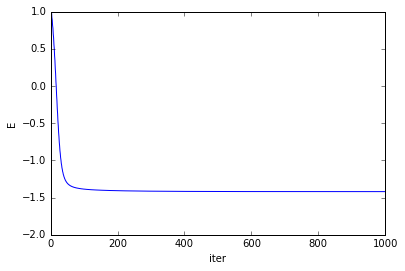

In [13]:
plt.plot(Elist)
plt.xlabel('iter')
plt.ylabel('E')
plt.ylim([-2,1])